In [1]:
import numpy as np
import pandas as pd

turker_data = pd.read_csv('/Users/ricky/Desktop/School/SP2019/CSE_518A/Homework/hw3/all_collected_data/rte.standardized.tsv',delimiter='\t',encoding='utf-8')
print('DataFrame length: ', len(turker_data))
print('Sample Turker Answers')
turker_data[turker_data['orig_id'] == 321]

DataFrame length:  8000
Sample Turker Answers


!amt_annotation_ids !amt_worker_ids  orig_id  \
160  89KZPYXSTGTJ0CZY2Y1ZB28YQ9GBT88Z2W1KDYTZ  A19IBSKBTABMR3      321   
161  89KZPYXSTGTJ0CZY2Y1ZYAJC56Z6FBPGXJYVPXM0   AEX5NCH03LWSG      321   
162  89KZPYXSTGTJ0CZY2Y1ZFWHATWX49Y3ZTPX4FYH0  A17RPF5ZMO75GW      321   
163  89KZPYXSTGTJ0CZY2Y1ZV89Z3WRZ6R8ZM4ZZZ070  A15L6WGIK3VU7N      321   
164  89KZPYXSTGTJ0CZY2Y1ZWZHZYZCCYYVYPDZVNRAZ  A3U7T47F498T1P      321   
165  89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      321   
166  89KZPYXSTGTJ0CZY2Y1ZQ30CJXY2EB96XJS543YZ  A1DCEOFAUIDY58      321   
167  89KZPYXSTGTJ0CZY2Y1ZXZ3ZNYY7VZKZSCY0B94Z  A1Q4VUJBMY78YR      321   
168  89KZPYXSTGTJ0CZY2Y1ZDZGGWVYY8XDZTKYC9XKZ  A18941IO2ZZWW6      321   
169  89KZPYXSTGTJ0CZY2Y1Z3Z7ZWY9J4WFMX60VRVXZ  A11GX90QFWDLMM      321   

     response  gold  
160         1     1  
161         1     1  
162         1     1  
163         1     1  
164         1     1  
165         0     1  
166         1     1  
167         1     1  
168         1     1  
169         1     1

In [2]:
def majority_voting_label(df, annotation_id, k):
    annotation_data = df.loc[df['orig_id'] == annotation_id]
    if(annotation_data.sample(n=k,replace=False)['response'].sum()/float(k) >= 0.5):
        return 1
    else:
        return 0
    
# majority voting data frame data created with dict comprehension
unique_ids = turker_data['orig_id'].unique()
frame_data = {orig_id:[majority_voting_label(df=turker_data, annotation_id=orig_id, k=k) for k in range(1,11)] for orig_id in unique_ids}

# majority voting data frame data create with for loop
# frame_data = dict()
# for orig_id in unique_ids:
#     frame_data[orig_id] = [majority_voting_label(df=turker_data, annotation_id=orig_id, k=k) for k in range(1,11)]

majority_aggregated_data = pd.DataFrame(data=frame_data)
majority_aggregated_data.index = majority_aggregated_data.index + 1
# majority_aggregated_data = majority_aggregated_data.append(turker_data.drop_duplicates(subset='orig_id')['gold'],ignore_index=True)
majority_aggregated_data = majority_aggregated_data.T
majority_aggregated_data = majority_aggregated_data.join(turker_data.drop_duplicates(subset='orig_id')[['orig_id','gold']].set_index('orig_id'))
majority_aggregated_data

1  2  3  4  5  6  7  8  9  10  gold
266   1  1  1  1  1  1  1  1  1   1     1
934   1  1  0  0  0  0  0  0  0   0     0
961   1  1  0  1  1  1  1  1  1   1     1
1814  1  1  1  1  1  1  1  1  1   1     1
134   1  0  1  0  0  0  0  0  0   0     0
294   1  1  1  1  1  1  1  1  1   1     1
103   0  0  0  0  0  0  0  0  0   0     0
303   1  1  1  1  1  1  1  1  1   1     1
2139  0  1  0  1  1  1  1  1  1   1     0
82    0  1  1  1  1  1  1  1  1   1     1
938   0  0  0  0  0  1  0  0  0   0     0
965   0  0  0  0  0  0  0  0  0   0     0
278   1  1  1  1  1  1  1  1  1   1     1
2129  1  1  0  0  0  0  0  0  0   0     0
1847  0  1  0  1  0  0  0  0  0   0     0
133   1  1  1  1  1  1  1  1  1   1     1
321   1  1  1  1  1  1  1  1  1   1     1
325   1  1  1  1  1  1  1  1  1   1     1
936   1  1  1  0  0  0  0  0  0   0     0
1848  0  1  0  1  1  0  1  1  0   1     0
2122  0  1  0  0  0  0  0  0  0   0     0
1816  1  0  0  1  1  0  0  0  0   0     0
1325  1  0  1  1  1  1  1  1  1   1     0
2123  0  0  0  0  0  0  0  0  0   0     0
1333  0  0  0  1  1  1  1  0  0   0     0
1216  1  1  0  1  1  1  1  1  1   1     1
1285  1  0  0  1  0  0  0  0  0   0     0
25    0  1  0  0  0  0  0  0  0   0     0
550   1  1  0  0  0  0  0  0  0   0     0
1299  1  1  1  1  0  1  1  1  1   1     1
...  .. .. .. .. .. .. .. .. ..  ..   ...
995   1  1  1  1  1  1  1  1  1   1     1
1979  0  1  0  1  0  0  0  0  0   0     0
507   1  0  1  1  1  1  1  1  0   1     1
1994  1  1  1  1  1  1  1  1  1   1     1
1967  1  1  1  1  1  1  1  1  1   1     1
553   0  1  1  0  0  1  0  0  0   0     0
1984  0  1  0  0  0  1  0  0  0   0     0
1441  0  1  0  1  0  0  0  0  0   0     0
1991  1  1  1  1  1  1  1  1  1   1     1
1427  0  0  0  0  0  0  0  0  0   0     0
1990  1  1  1  1  0  0  1  0  0   0     0
48    0  0  1  1  1  1  0  0  0   0     1
1955  0  1  1  1  1  1  1  1  1   1     1
1421  1  0  0  0  0  0  0  0  0   0     0
1963  1  1  1  1  1  1  1  1  1   1     1
1425  0  1  0  0  0  0  0  0  0   0     0
1563  1  1  1  1  0  1  1  1  1   1     1
2048  0  1  0  0  0  0  0  0  0   0     0
1546  1  1  1  1  1  1  1  1  1   1     1
2042  0  1  0  0  0  1  0  0  0   0     0
2058  0  0  0  0  0  0  0  0  0   0     0
1596  0  1  0  1  0  1  1  1  0   1     1
1476  1  1  1  1  1  1  1  1  1   1     1
1555  1  1  1  1  1  1  1  1  1   1     1
1536  0  1  0  1  0  0  0  0  0   0     0
1597  0  1  1  1  1  1  1  1  1   1     1
1539  0  1  1  1  1  0  0  0  0   0     0
1556  1  1  1  1  1  1  1  1  1   1     1
1482  1  1  0  0  0  0  0  0  0   0     0
605   0  1  1  1  1  1  1  1  1   1     1

[800 rows x 11 columns]

In [3]:
mean_aggregation_error = 1 - pd.Series([(majority_aggregated_data[k] == majority_aggregated_data['gold']).astype(int).mean() for k in range(1,11)])
mean_aggregation_error.index = mean_aggregation_error.index + 1
mean_aggregation_error

1     0.27000
2     0.31250
3     0.19375
4     0.22125
5     0.16125
6     0.17625
7     0.13125
8     0.14750
9     0.10125
10    0.12500
dtype: float64

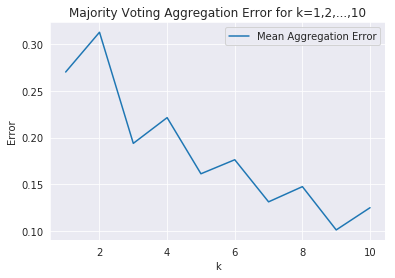

In [4]:
%matplotlib inline
# import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
ax = sns.lineplot(x=mean_aggregation_error.index, y=mean_aggregation_error)
ax.set(title='Majority Voting Aggregation Error for k=1,2,...,10', xlabel='k', ylabel='Error')
ax.legend(['Mean Aggregation Error']);

In [5]:
turker_data[turker_data['orig_id'] == 321][['!amt_worker_ids', 'orig_id', 'response']]

!amt_worker_ids  orig_id  response
160  A19IBSKBTABMR3      321         1
161   AEX5NCH03LWSG      321         1
162  A17RPF5ZMO75GW      321         1
163  A15L6WGIK3VU7N      321         1
164  A3U7T47F498T1P      321         1
165   AXBQF8RALCIGV      321         0
166  A1DCEOFAUIDY58      321         1
167  A1Q4VUJBMY78YR      321         1
168  A18941IO2ZZWW6      321         1
169  A11GX90QFWDLMM      321         1

In [6]:
pd.crosstab(turker_data['!amt_worker_ids'], turker_data['orig_id']).loc['A3U7T47F498T1P', :]

orig_id
25      0
35      0
39      0
48      0
49      0
75      0
82      1
93      0
101     0
103     1
104     0
113     0
116     0
133     1
134     1
136     0
139     0
142     0
164     0
166     0
174     0
185     0
186     0
219     0
236     0
246     0
261     0
263     0
264     0
266     1
       ..
2127    0
2129    1
2133    0
2134    0
2135    0
2136    0
2138    0
2139    1
2144    0
2145    0
2146    0
2148    0
2149    0
2151    0
2152    0
2153    0
2155    0
2157    0
2162    0
2163    0
2167    0
2168    0
2169    0
2171    0
2173    0
2175    0
2176    0
2179    0
2187    0
2190    0
Name: A3U7T47F498T1P, Length: 800, dtype: int64

In [7]:
one_worker = turker_data[turker_data['!amt_worker_ids'] == 'AXBQF8RALCIGV']
one_worker

!amt_annotation_ids !amt_worker_ids  orig_id  \
5     89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      266   
15    89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      934   
25    89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      961   
35    89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV     1814   
45    89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      134   
55    89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      294   
65    89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      103   
75    89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      303   
85    89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV     2139   
95    89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV       82   
105   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      938   
115   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      965   
125   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      278   
135   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV     2129   
145   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV     1847   
155   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      133   
165   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      321   
175   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      325   
185   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV      936   
195   89KZPYXSTGTJ0CZY2Y1Z09PZYS137RPZT6SY4A20   AXBQF8RALCIGV     1848   
404   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1324   
414   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1341   
424   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1307   
434   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1212   
444   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1334   
454   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1305   
464   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1201   
474   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1254   
484   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1265   
494   YV6ZG2H0A0B8Z5X1WW508YBZ1NGV2G2Z28ZAF0E0   AXBQF8RALCIGV     1277   
...                                        ...             ...      ...   
7701  8WC4NEZZ9XAZ7TY0PA3ZBZBZRMYK6VVTTDYN1TKZ   AXBQF8RALCIGV      995   
7710  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1979   
7720  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV      507   
7730  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1994   
7740  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1967   
7750  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV      553   
7760  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1984   
7770  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1441   
7780  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1991   
7790  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1427   
7800  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1990   
7810  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV       48   
7820  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1955   
7830  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1421   
7840  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1963   
7850  RYKJV1ZM5WYZ2BRVPVZ0BY54R2XJD27ZRKD628ZZ   AXBQF8RALCIGV     1425   
7862  3KKZZ6ZEGYZZRKWRC9K0BBV8ZHMV2XXMGTZBGYZ0   AXBQF8RALCIGV     1563   
7872  3KKZZ6ZEGYZZRKWRC9K0BBV8ZHMV2XXMGTZBGYZ0   AXBQF8RALCIGV     2048   
7882  3KKZZ6ZEGYZZRKWRC9K0BBV8ZHMV2XXMGTZBGYZ0   AXBQF8RALCIGV     1546   
7892  3KKZZ6ZEGYZZRKWRC9K0BBV8ZHMV2XXMGTZBGYZ0   AXBQF8RALCIGV     2042   
7902  3KKZZ6ZEGYZZRKWRC9K0BBV8ZHMV2XXMGTZBGYZ0   AXBQF8RALCIGV     2058   
7912  3KKZZ6ZEGYZZRKWRC9K0BBV8ZHMV2XXMGTZBGYZ0   AXB

In [8]:

turker_data[turker_data['orig_id'] == 321]
worker_ids = turker_data['!amt_worker_ids'].unique()
columns = {0 : worker_ids}
worker_series = pd.DataFrame(worker_ids).set_index(0)
worker_series

Empty DataFrame
Columns: []
Index: [A19IBSKBTABMR3, AEX5NCH03LWSG, A17RPF5ZMO75GW, A15L6WGIK3VU7N, A3U7T47F498T1P, AXBQF8RALCIGV, A1DCEOFAUIDY58, A1Q4VUJBMY78YR, A18941IO2ZZWW6, A11GX90QFWDLMM, A2K5ICP43ML4PW, AHPSMRLKAEJV, A25QX7IUS1KI5E, A2RV3FIO3IAZS, ATP8SOHDM9QOY, A14JQX7IFAICP0, A1GD3MQELM1R9M, A1SM3O307GMDK8, AZKV0OXDZVDYR, A1BG7KLBHHCLYP, AS51Z6DBWM9JM, A1ORRI82WFHIKZ, A37BYUF88E7RZ0, A19G248ZRHWWHT, A2BYHSKILYQWEU, AD4FDBEA9GGFE, A19PMUTQXDIPLZ, A3HR7E5S52PME5, A1FESKIC2CUD4Y, A1APFXFJHE25EE, A3JEUXPU5NEHXR, A14WWG6NKBDWGP, A2CJUR18C55EF4, AKTL5L2PJ2XCH, A9YV82C0R0HHU, AZG7NPU1UZMPM, AM367N2MAMQ15, A24R6AHP7B0TLN, A2HNP1YL1IBFMU, A2TFRXLFNLRE10, A15MN5MDG4D7Q9, A16D3RBFGNRKL8, A37XSAE8QVBVGS, A3VMJIW0DP7007, A2NCIFVGIZESDF, AK7YVYGMIF6T0, AHFO0JTF5WO8J, A2PAV7JATODL20, A2CET0W1FJGMV, A3KQFLPDA52RE, A3Q9V4M3V0L77A, A389Z7A60D4L8I, A2XAB2SZD9816Y, AJR1HBQLBT2UT, A1BLK8SJHCYOQK, A17HNBZF5A1CWF, A1L1WI1BXLLZZM, A2O3686VJEDHBU, A3TBGB7VGRRYCT, A32D1CITAL0BAY, AYZHZZZE0UP0A, ADMPXNDZ8F6QA, APOA130JRSXAV, AJ9MI2GEX5R28, A2QH0Y8GLQ090K, A1QL3BQX00Y2OC, AVIVV0WYFK6EJ, A39APWH62XBLR9, AQ6JP5VBCTYDN, A3NWTTG6VC0N8S, A1G42XP7E394WU, A3MWTGQFPYGGW6, A29CFIMDI0ID2V, AQ1WI10VDQ7FE, A5TYBSH7AYMK7, A3B9CRWYGCJ1GJ, A1XXMVPHRKUTAH, A3LMXIKF4NPSBN, A358E8MG0GCC37, A1LY3NJTYW9TFF, A27SZLZECUSPWB, ADX3CN405XAMF, A2VKQM4ESHIS95, A2YRAPAV1WNYWB, A3BY5HXZIM04PN, A1M0SEWUJYX9K0, A3RW8TMXMQ7I6B, A2QPX2MS844TYJ, A34JFTRXZ9U33N, AO49JS7KNRQ5A, AH02ZNR6AGX8J, A5M1CDOBQXIND, A1FSNT6DWYDIWA, A2G80S3EM9SDBD, A2KST2DIWAB8Z4, AD1BB9AC3IZXQ, A30DASEJS2ZINX, A1K0I2MPF4CF13, A1UQKF8NB9FVOA, A5SQMVCBLLR10, ...]

[164 rows x 0 columns]

In [9]:
worker_responses = turker_data[turker_data['orig_id'] == 321][['!amt_worker_ids', 'response']].set_index('!amt_worker_ids').sample(n=3)
worker_responses = worker_responses.rename(columns={'response': 321})
worker_responses

321
!amt_worker_ids     
A19IBSKBTABMR3     1
A17RPF5ZMO75GW     1
AXBQF8RALCIGV      0

In [10]:
joined_series = worker_series.join(worker_responses)
joined_series = joined_series.replace(0.0,-1.0)
joined_series = joined_series.fillna(0.0)
joined_series

321
0                  
A19IBSKBTABMR3  1.0
AEX5NCH03LWSG   0.0
A17RPF5ZMO75GW  1.0
A15L6WGIK3VU7N  0.0
A3U7T47F498T1P  0.0
AXBQF8RALCIGV  -1.0
A1DCEOFAUIDY58  0.0
A1Q4VUJBMY78YR  0.0
A18941IO2ZZWW6  0.0
A11GX90QFWDLMM  0.0
A2K5ICP43ML4PW  0.0
AHPSMRLKAEJV    0.0
A25QX7IUS1KI5E  0.0
A2RV3FIO3IAZS   0.0
ATP8SOHDM9QOY   0.0
A14JQX7IFAICP0  0.0
A1GD3MQELM1R9M  0.0
A1SM3O307GMDK8  0.0
AZKV0OXDZVDYR   0.0
A1BG7KLBHHCLYP  0.0
AS51Z6DBWM9JM   0.0
A1ORRI82WFHIKZ  0.0
A37BYUF88E7RZ0  0.0
A19G248ZRHWWHT  0.0
A2BYHSKILYQWEU  0.0
AD4FDBEA9GGFE   0.0
A19PMUTQXDIPLZ  0.0
A3HR7E5S52PME5  0.0
A1FESKIC2CUD4Y  0.0
A1APFXFJHE25EE  0.0
...             ...
A1I48Z1CH0458V  0.0
A14Q86RX5HGCN   0.0
A3BMXJJ6MRE5C1  0.0
A7B3KMBP39QWF   0.0
A1NCNZ96FZP9MC  0.0
A2XRLW6EWPXFZJ  0.0
A1IPO1FAD1A60X  0.0
A24KZL47I6CH4C  0.0
A1CP0KZJS5LSIF  0.0
A1ZVGUVI9TAZJX  0.0
A15H21NMKA3TE4  0.0
AADS3JU8O57J3   0.0
A2LL0VL0D92ZL1  0.0
A3N3ESBU769SMG  0.0
ADAGUJNWMEPT6   0.0
A1W8YY6KOEOG6   0.0
A1ZIUN0W12X1SP  0.0
AMVOSOXRSRMHD   0.0
AKZ9MWLHRE34O   0.0
A1JGQL8LIRM598  0.0
A1WH4J0UT8YAPQ  0.0
A37C370E0K9GDI  0.0
A3ODY8U1EQDB8S  0.0
A34AZLVR1033TZ  0.0
A2MN1MDFIH9CEW  0.0
A366APTH5ECXG1  0.0
A16WH8PG6BUGSR  0.0
A3EX8IW960QJ3I  0.0
ATJQTHNPVWH9    0.0
A153JJMSL7V3C9  0.0

[164 rows x 1 columns]

# This cell creates the Worker Task Matrix for how the workers actually responded

In [11]:
worker_ids = turker_data['!amt_worker_ids'].unique()
columns = {'amt_worker_id' : worker_ids}
worker_task_matrix = pd.DataFrame(columns).set_index('amt_worker_id')
for task_id in unique_ids:
    worker_responses = turker_data[turker_data['orig_id'] == task_id][['!amt_worker_ids', 'response']].set_index('!amt_worker_ids')
    worker_responses = worker_responses.rename(columns={'response': task_id})
    worker_task_matrix = worker_task_matrix.join(worker_responses)
worker_task_matrix = worker_task_matrix.replace(0.0,-1.0)
worker_task_matrix = worker_task_matrix.fillna(0.0)
worker_task_matrix = worker_task_matrix.T
worker_task_matrix

amt_worker_id  A19IBSKBTABMR3  AEX5NCH03LWSG  A17RPF5ZMO75GW  A15L6WGIK3VU7N  \
266                       1.0            1.0             1.0            -1.0   
934                      -1.0           -1.0            -1.0            -1.0   
961                       1.0           -1.0             1.0            -1.0   
1814                      1.0            1.0             1.0             1.0   
134                       1.0           -1.0            -1.0            -1.0   
294                       1.0            1.0             1.0             1.0   
103                      -1.0           -1.0            -1.0            -1.0   
303                       1.0           -1.0             1.0             1.0   
2139                      1.0           -1.0            -1.0            -1.0   
82                        1.0            1.0             1.0             1.0   
938                      -1.0           -1.0             1.0            -1.0   
965                      -1.0           -1.0            -1.0            -1.0   
278                       1.0            1.0             1.0             1.0   
2129                     -1.0           -1.0            -1.0            -1.0   
1847                     -1.0           -1.0            -1.0            -1.0   
133                       1.0            1.0             1.0             1.0   
321                       1.0            1.0             1.0             1.0   
325                       1.0            1.0            -1.0             1.0   
936                      -1.0           -1.0            -1.0            -1.0   
1848                      1.0            1.0            -1.0            -1.0   
2122                      0.0            0.0             0.0            -1.0   
1816                      0.0            0.0             0.0            -1.0   
1325                      0.0            0.0             0.0             1.0   
2123                      0.0            0.0             0.0            -1.0   
1333                      0.0            0.0             0.0            -1.0   
1216                      0.0            0.0             0.0             1.0   
1285                      0.0            0.0             0.0            -1.0   
25                        0.0            0.0             0.0            -1.0   
550                       0.0            0.0             0.0            -1.0   
1299                      0.0            0.0             0.0             1.0   
...                       ...            ...             ...             ...   
995                       0.0            1.0             0.0             0.0   
1979                      0.0           -1.0             0.0             0.0   
507                       0.0            1.0             0.0             0.0   
1994                      0.0            1.0             0.0             0.0   
1967                      0.0            1.0             0.0             0.0   
553                       0.0           -1.0             0.0             0.0   
1984                      0.0           -1.0             0.0             0.0   
1441                      0.0           -1.0             0.0             0.0   
1991                      0.0            1.0             0.0             0.0   
1427                      0.0           -1.0             0.0             0.0   
1990                      0.0           -1.0             0.0             0.0   
48                        0.0           -1.0             0.0             0.0   
1955                      0.0            1.0             0.0             0.0   
1421                      0.0           -1.0             0.0             0.0   
1963                      0.0            1.0             0.0             0.0   
1425                      0.0           -1.0             0.0             0.0   
1563                      0.0            0.0             0.0             0.0   
2048                      0.0            0.0             0.0             0.0   


## Example $\phi$ Nx1 Row Vector of a single Worker's Votes for every Job.

## \begin{equation}
\vec{\phi}^{\{N*1\}}\in \{-1.0, 0.0, 1.0\}
\end{equation}

In [12]:
# example_phi = worker_task_matrix.loc['ATJQTHNPVWH9', worker_task_matrix.loc['ATJQTHNPVWH9', :] == -1.0]
# pd.concat([worker_task_matrix.loc['ATJQTHNPVWH9', worker_task_matrix.loc['ATJQTHNPVWH9', :] == -1.0], \
#            worker_task_matrix.loc['ATJQTHNPVWH9', worker_task_matrix.loc['ATJQTHNPVWH9', :] == 1.0]])
example_phi = worker_task_matrix.loc[:, 'ATJQTHNPVWH9']
example_phi

266     0.0
934     0.0
961     0.0
1814    0.0
134     0.0
294     0.0
103     0.0
303     0.0
2139    0.0
82      0.0
938     0.0
965     0.0
278     0.0
2129    0.0
1847    0.0
133     0.0
321     0.0
325     0.0
936     0.0
1848    0.0
2122    0.0
1816    0.0
1325    0.0
2123    0.0
1333    0.0
1216    0.0
1285    0.0
25      0.0
550     0.0
1299    0.0
       ... 
995     0.0
1979    0.0
507     0.0
1994    0.0
1967    0.0
553     0.0
1984    0.0
1441    0.0
1991    0.0
1427    0.0
1990    0.0
48      0.0
1955    0.0
1421    0.0
1963    0.0
1425    0.0
1563    0.0
2048    0.0
1546    0.0
2042    0.0
2058    0.0
1596    0.0
1476    0.0
1555    0.0
1536    0.0
1597    0.0
1539    0.0
1556    0.0
1482    0.0
605     0.0
Name: ATJQTHNPVWH9, Length: 800, dtype: float64

## Example $q$ Tx1 Column Vector of all Worker Votes on a single Job.

## \begin{equation}
\vec{q}^{\{T*1\}}\in \{-1.0, 0.0, 1.0\}
\end{equation}

In [13]:
example_q = worker_task_matrix.loc[321, :]
example_q

amt_worker_id
A19IBSKBTABMR3    1.0
AEX5NCH03LWSG     1.0
A17RPF5ZMO75GW    1.0
A15L6WGIK3VU7N    1.0
A3U7T47F498T1P    1.0
AXBQF8RALCIGV    -1.0
A1DCEOFAUIDY58    1.0
A1Q4VUJBMY78YR    1.0
A18941IO2ZZWW6    1.0
A11GX90QFWDLMM    1.0
A2K5ICP43ML4PW    0.0
AHPSMRLKAEJV      0.0
A25QX7IUS1KI5E    0.0
A2RV3FIO3IAZS     0.0
ATP8SOHDM9QOY     0.0
A14JQX7IFAICP0    0.0
A1GD3MQELM1R9M    0.0
A1SM3O307GMDK8    0.0
AZKV0OXDZVDYR     0.0
A1BG7KLBHHCLYP    0.0
AS51Z6DBWM9JM     0.0
A1ORRI82WFHIKZ    0.0
A37BYUF88E7RZ0    0.0
A19G248ZRHWWHT    0.0
A2BYHSKILYQWEU    0.0
AD4FDBEA9GGFE     0.0
A19PMUTQXDIPLZ    0.0
A3HR7E5S52PME5    0.0
A1FESKIC2CUD4Y    0.0
A1APFXFJHE25EE    0.0
                 ... 
A1I48Z1CH0458V    0.0
A14Q86RX5HGCN     0.0
A3BMXJJ6MRE5C1    0.0
A7B3KMBP39QWF     0.0
A1NCNZ96FZP9MC    0.0
A2XRLW6EWPXFZJ    0.0
A1IPO1FAD1A60X    0.0
A24KZL47I6CH4C    0.0
A1CP0KZJS5LSIF    0.0
A1ZVGUVI9TAZJX    0.0
A15H21NMKA3TE4    0.0
AADS3JU8O57J3     0.0
A2LL0VL0D92ZL1    0.0
A3N3ESBU769SMG    

In [14]:
from scipy.linalg import svd

# decomp = svd(worker_task_matrix)
U = worker_task_matrix
# U = np.random.randint(2, size=(800,800))
# U[U == 0] = -1
UUT = U.dot(U.T)
UUT

266   934   961   1814  134   294   103   303   2139  82    ...  2058  \
266   10.0   0.0   2.0   4.0  -2.0   6.0  -4.0   2.0   2.0   8.0  ...  -2.0   
934    0.0  10.0   0.0  -6.0   0.0  -4.0   6.0  -4.0   4.0  -2.0  ...  -2.0   
961    2.0   0.0  10.0   4.0   2.0   2.0   4.0   2.0   6.0   0.0  ...  -2.0   
1814   4.0  -6.0   4.0  10.0   0.0   8.0  -2.0   4.0   0.0   6.0  ...  -2.0   
134   -2.0   0.0   2.0   0.0  10.0  -2.0   4.0   2.0   2.0  -4.0  ...   0.0   
294    6.0  -4.0   2.0   8.0  -2.0  10.0  -4.0   6.0   2.0   8.0  ...   0.0   
103   -4.0   6.0   4.0  -2.0   4.0  -4.0  10.0  -4.0   4.0  -6.0  ...  -2.0   
303    2.0  -4.0   2.0   4.0   2.0   6.0  -4.0  10.0   2.0   4.0  ...   2.0   
2139   2.0   4.0   6.0   0.0   2.0   2.0   4.0   2.0  10.0   0.0  ...   0.0   
82     8.0  -2.0   0.0   6.0  -4.0   8.0  -6.0   4.0   0.0  10.0  ...  -2.0   
938   -4.0   2.0   0.0  -6.0   0.0  -4.0   2.0   0.0   0.0  -6.0  ...   4.0   
965   -6.0   4.0   2.0  -4.0   6.0  -6.0   8.0  -2.0   2.0  -8.0  ...   0.0   
278    4.0  -6.0   4.0  10.0   0.0   8.0  -2.0   4.0   0.0   6.0  ...  -2.0   
2129  -6.0   4.0   2.0  -4.0   6.0  -6.0   8.0  -2.0   2.0  -8.0  ...   0.0   
1847  -6.0   4.0   2.0  -4.0   2.0  -6.0   8.0  -6.0   2.0  -8.0  ...   0.0   
133    2.0  -8.0  -2.0   4.0  -2.0   6.0  -8.0   6.0  -2.0   4.0  ...   4.0   
321    4.0  -6.0   4.0  10.0   0.0   8.0  -2.0   4.0   0.0   6.0  ...  -2.0   
325    4.0  -2.0   0.0   6.0   0.0   8.0  -2.0   4.0   4.0   6.0  ...   0.0   
936   -2.0   8.0   2.0  -4.0   2.0  -2.0   8.0  -2.0   6.0  -4.0  ...   0.0   
1848   0.0   2.0   0.0  -2.0   0.0   0.0   2.0  -4.0   4.0  -2.0  ...   2.0   
2122   3.0   3.0   3.0   1.0   1.0   1.0   3.0  -1.0   3.0   1.0  ...  -1.0   
1816   3.0   3.0   3.0   1.0   1.0   1.0   3.0  -1.0   3.0   1.0  ...  -3.0   
1325   1.0   1.0   1.0   3.0  -1.0   3.0   1.0   1.0   1.0   3.0  ...  -3.0   
2123   1.0   1.0   1.0  -1.0  -1.0  -1.0   1.0  -3.0   1.0  -1.0  ...   1.0   
1333   3.0   3.0   3.0   1.0   1.0   1.0   3.0  -1.0   3.0   1.0  ...  -1.0   
1216   1.0   1.0   1.0   3.0  -1.0   3.0   1.0   1.0   1.0   3.0  ...  -1.0   
1285   3.0   3.0   3.0   1.0   1.0   1.0   3.0  -1.0   3.0   1.0  ...  -1.0   
25     3.0   3.0   3.0   1.0   1.0   1.0   3.0  -1.0   3.0   1.0  ...  -1.0   
550    1.0   1.0   1.0  -1.0  -1.0  -1.0   1.0  -3.0   1.0  -1.0  ...   1.0   
1299  -1.0  -1.0  -1.0   1.0   1.0   1.0  -1.0   3.0  -1.0   1.0  ...  -1.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
995    3.0   1.0   1.0   3.0  -1.0   5.0   1.0   1.0   3.0   3.0  ...   0.0   
1979  -1.0   1.0   5.0   3.0   3.0   1.0   5.0   1.0   3.0  -1.0  ...  -2.0   
507    1.0  -1.0   3.0   5.0   1.0   3.0   3.0  -1.0   1.0   1.0  ...  -2.0   
1994   3.0   1.0   1.0   3.0  -1.0   1.0   1.0  -3.0  -1.0   3.0  ...  -4.0   
1967   3.0   1.0   1.0   3.0  -1.0   5.0   1.0   1.0   3.0   3.0  ...   0.0   
553   -1.0   1.0   5.0   3.0   3.0   1.0   5.0   1.0   3.0  -1.0  ...  -2.0   
1984   1.0   3.0   3.0   1.0   1.0   3.0   3.0   3.0   5.0   1.0  ...   0.0   
1441   1.0   3.0   3.0   1.0   1.0   3.0   3.0   3.0   5.0   1.0  ...   0.0   
1991   3.0   1.0   1.0   3.0  -1.0   5.0   1.0   1.0   3.0   3.0  ...   0.0   
1427  -1.0   1.0   1.0  -1.0  -1.0   1.0   1.0   1.0   3.0  -1.0  ...   2.0   
1990   1.0   3.0   3.0   1.0   1.0   3.0   3.0   3.0   5.0   1.0  ...   0.0   
48    -1.0   1.0   5.0   3.0   3.0   1.0   5.0   1.0   3.0  -1.0  ...  -2.0   
1955   5.0   3.0  -1.0   1.0  -3.0   3.0  -1.0  -1.0   1.0   5.0  ...  -2.0   
1421   3.0   5.0   1.0  -1.0  -1.0   1.0   1.0   1.0   3.0   3.0  ...  -2.0   
1963   3.0   1.0   1.0   3.0  -1.0   5.0   1.0   1.0   3.0   3.0  ...   0.0   
1425   3.0   5.0   1.0  -1.0  -1.0   1.0   1.0   1.0   3.0   3.0  ...  -2.0   
1563   2.0   2.0   2.0   2.0   0.0   0.0   2.0  -2.0   0.0   2.0  ...  -6.0   
2048   0.0   0.0   0.0   0.0  -2.0   2.0   0.0   0.0   2.0   0.0  ...   8.0   
1546   4.0   4.0   0.0   0.0  -2.0   2.0   0.0   0.0   2

In [15]:
w, v = np.linalg.eig(UUT)
top_eigenvalue = np.max(w)
print('Top Eigenvalue: ', np.max(w))
print('Top Eigenvalue index: ', np.argmax(w))

Top Eigenvalue:  (1224.5137428534126+0j)
Top Eigenvalue index:  0


In [16]:
from sklearn import preprocessing

v = preprocessing.normalize(v.astype('float'), norm='l2')

/Users/ricky/Desktop/School/SP2019/CSE_518A/Homework/label-aggregation-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
top_eigenvector = v[np.argmax(w)]
top_eigenvector

array([ 7.61686574e-02, -6.37276270e-02, -7.05498199e-02,  6.12621110e-02,
        1.19875909e-01,  1.40292985e-01,  1.94487589e-03, -5.20876869e-02,
       -1.15688491e-01,  1.94056504e-02,  8.55095881e-02,  4.10797669e-02,
       -6.82340301e-02,  5.61733603e-02,  4.86819220e-02, -3.90313236e-02,
        2.87414581e-02,  3.87492540e-02,  2.90346846e-02, -1.54041090e-02,
       -9.59443061e-02, -5.38790034e-02, -2.14463149e-02, -1.36830486e-02,
       -4.95349628e-02, -5.12747748e-02,  8.05598728e-02, -1.88499499e-02,
       -8.61751654e-02,  7.63499176e-02,  2.51945808e-02,  2.71889299e-01,
        4.02943404e-02, -5.89829228e-02, -7.91455648e-02,  6.52907740e-02,
       -2.59558220e-02,  5.70762304e-02,  1.68907997e-02,  3.69886454e-03,
        1.30346865e-01,  2.04528488e-01, -1.30672524e-01,  4.65222335e-02,
        9.52186324e-02, -6.29292241e-02,  6.24185109e-03,  1.05446852e-01,
        8.14143676e-03,  5.07250310e-02,  1.28472105e-01,  9.64511351e-04,
        5.65704952e-02, -

In [18]:
predicted_labels = np.sign(top_eigenvector)
print('Length of top Eigenvector:', len(predicted_labels))
predicted_labels = predicted_labels.astype('int')
predicted_labels

Length of top Eigenvector: 800


array([ 1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1,  1,  1

In [19]:
predicted_labels = pd.Series(data=predicted_labels, index=unique_ids)
user_one_rating = worker_task_matrix.loc[:, 'A19IBSKBTABMR3']
user_one_rating = user_one_rating[user_one_rating != 0]
if((user_one_rating == predicted_labels[user_one_rating.index]).astype('int').mean() < 0.5):
    predicted_labels = -predicted_labels
predicted_labels

266     1
934    -1
961    -1
1814    1
134     1
294     1
103     1
303    -1
2139   -1
82      1
938     1
965     1
278    -1
2129    1
1847    1
133    -1
321     1
325     1
936     1
1848   -1
2122   -1
1816   -1
1325   -1
2123   -1
1333   -1
1216   -1
1285    1
25     -1
550    -1
1299    1
       ..
995    -1
1979   -1
507     1
1994    1
1967    1
553     1
1984   -1
1441   -1
1991   -1
1427   -1
1990   -1
48     -1
1955   -1
1421   -1
1963    1
1425    1
1563    1
2048    1
1546    1
2042    1
2058    1
1596    1
1476    1
1555    1
1536   -1
1597    1
1539   -1
1556   -1
1482    1
605     1
Length: 800, dtype: int64

In [20]:
ground_truth = turker_data.drop_duplicates(subset='orig_id')[['orig_id','gold']].set_index('orig_id').replace(0.0,-1.0)
ground_truth = ground_truth['gold']
ground_truth

orig_id
266     1.0
934    -1.0
961     1.0
1814    1.0
134    -1.0
294     1.0
103    -1.0
303     1.0
2139   -1.0
82      1.0
938    -1.0
965    -1.0
278     1.0
2129   -1.0
1847   -1.0
133     1.0
321     1.0
325     1.0
936    -1.0
1848   -1.0
2122   -1.0
1816   -1.0
1325   -1.0
2123   -1.0
1333   -1.0
1216    1.0
1285   -1.0
25     -1.0
550    -1.0
1299    1.0
       ... 
995     1.0
1979   -1.0
507     1.0
1994    1.0
1967    1.0
553    -1.0
1984   -1.0
1441   -1.0
1991    1.0
1427   -1.0
1990   -1.0
48      1.0
1955    1.0
1421   -1.0
1963    1.0
1425   -1.0
1563    1.0
2048   -1.0
1546    1.0
2042   -1.0
2058   -1.0
1596    1.0
1476    1.0
1555    1.0
1536   -1.0
1597    1.0
1539   -1.0
1556    1.0
1482   -1.0
605     1.0
Name: gold, Length: 800, dtype: float64

In [21]:
mean_aggregation_error_spectral = 1-(ground_truth == predicted_labels).astype('int').mean()
mean_aggregation_error_spectral

0.495

In [22]:
def spectral_aggregate(turker_data, k):
    # Create Worker Task Matrix U
    worker_ids = turker_data['!amt_worker_ids'].unique()
    # Original index column of unique worker id's
    columns = {'amt_worker_id' : worker_ids}
    U = pd.DataFrame(columns).set_index('amt_worker_id')
    # Continually join columns onto index as where each column is a worker's response to every job id
    # by looping over the unique job_ids
    for task_id in unique_ids:
        worker_responses = turker_data[turker_data['orig_id'] == task_id][['!amt_worker_ids', 'response']] \
                                                                        .set_index('!amt_worker_ids').sample(n=k)
        worker_responses = worker_responses.rename(columns={'response': task_id})
        U = U.join(worker_responses)
    # Change prediction labels to {-1,1} and 0 if the user did not provide an answer to that question
    U = U.replace(0.0,-1.0)
    U = U.fillna(0.0)
    # Transpose to get "Rater" in column and "Contribution" in row just like in paper and slides
    U = U.T
    
    # Compute Eigenvectors of U*U^T and normalize
    UUT = U.dot(U.T)
    w, v = np.linalg.eig(UUT)
    v = preprocessing.normalize(v.astype('float'), norm='l2')
    top_eigenvector = v[np.argmax(w)]
    
    # Predict labels based off top eigenvector
    predicted_labels = np.sign(top_eigenvector).astype('int')
    s = pd.Series(data=predicted_labels, index=unique_ids)
    
    # Get the first worker's labels for all job id's, only look at jobs they labeled (u1 != 0)
    u1 = worker_task_matrix.iloc[:, 0]
    u1 = u1[u1 != 0]
    
    # If the majority of the sign is not the same as the prediction of user 1, flip the prediction signs
    if((u1 == s[u1.index]).astype('int').mean() < 0.5):
        s = -s
        
    return s

In [23]:
spectral_frame_data = {k:spectral_aggregate(turker_data=turker_data, k=k) for k in range(1,11)}
spectral_aggregated_data = pd.DataFrame(data=spectral_frame_data, index=unique_ids)
# majority_aggregated_data = majority_aggregated_data.append(turker_data.drop_duplicates(subset='orig_id')['gold'],ignore_index=True)
# majority_aggregated_data = majority_aggregated_data.T
spectral_aggregated_data = spectral_aggregated_data.join(turker_data.drop_duplicates(subset='orig_id')[['orig_id','gold']].set_index('orig_id'))
spectral_aggregated_data = spectral_aggregated_data.replace(-1,0)
spectral_aggregated_data

/Users/ricky/Desktop/School/SP2019/CSE_518A/Homework/label-aggregation-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/ricky/Desktop/School/SP2019/CSE_518A/Homework/label-aggregation-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/ricky/Desktop/School/SP2019/CSE_518A/Homework/label-aggregation-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/ricky/Desktop/School/SP2019/CSE_518A/Homework/label-aggregation-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/ricky/Desktop/School/SP2019/CSE_518A/Homework/label-aggregation-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards

1  2  3  4  5  6  7  8  9  10  gold
266   0  0  1  1  0  0  1  1  1   1     1
934   0  1  0  0  0  1  0  0  1   0     0
961   1  0  0  1  1  0  1  0  1   0     1
1814  1  1  1  0  1  1  1  1  0   1     1
134   1  1  1  0  1  1  0  1  0   1     0
294   0  1  0  1  1  0  0  1  1   1     1
103   0  1  0  0  0  0  0  0  1   1     0
303   1  1  1  1  1  1  0  1  1   0     1
2139  1  1  0  0  1  1  0  0  1   0     0
82    0  0  1  1  0  1  1  0  1   1     1
938   0  1  0  0  1  1  1  0  1   1     0
965   0  1  0  0  1  1  1  0  1   1     0
278   1  1  1  1  0  1  1  0  0   0     1
2129  0  1  0  1  0  1  0  0  0   1     0
1847  0  0  1  0  1  1  0  1  1   1     0
133   0  1  1  1  1  0  1  1  1   0     1
321   0  0  1  0  0  1  0  1  1   1     1
325   0  0  1  0  0  1  1  1  1   1     1
936   1  0  0  0  0  1  0  0  1   1     0
1848  1  0  1  1  1  1  1  1  0   0     0
2122  1  0  1  0  0  0  1  0  0   0     0
1816  0  1  1  0  1  1  0  1  1   0     0
1325  0  0  0  0  1  1  0  1  0   0     0
2123  0  0  0  0  1  1  0  0  0   0     0
1333  1  0  1  0  1  0  1  0  1   0     0
1216  0  1  0  0  0  0  1  0  1   0     1
1285  1  1  1  0  1  0  1  1  1   1     0
25    1  1  0  0  1  1  1  0  1   0     0
550   0  1  1  1  0  0  0  1  0   0     0
1299  0  1  1  1  0  1  0  0  0   1     1
...  .. .. .. .. .. .. .. .. ..  ..   ...
995   0  0  1  1  1  0  1  0  1   0     1
1979  0  0  1  1  1  1  1  1  0   0     0
507   0  0  0  1  1  1  1  1  0   1     1
1994  0  1  0  1  1  1  1  0  0   1     1
1967  0  1  0  0  1  0  1  0  1   1     1
553   0  0  0  0  1  1  1  0  0   1     0
1984  0  0  0  0  1  1  0  0  0   0     0
1441  0  1  0  1  1  1  0  1  1   0     0
1991  0  1  0  1  0  1  1  1  0   0     1
1427  0  0  1  0  0  1  1  0  0   0     0
1990  0  1  1  0  0  1  0  1  0   0     0
48    0  1  0  0  0  1  1  1  0   0     1
1955  0  1  1  0  1  1  1  0  0   0     1
1421  0  0  1  0  1  1  1  0  0   0     0
1963  0  0  1  1  1  1  1  1  0   1     1
1425  0  0  1  1  1  1  0  0  1   1     0
1563  0  0  1  1  0  0  1  1  1   1     1
2048  0  0  1  1  0  0  1  0  0   1     0
1546  0  1  1  1  0  0  0  1  0   1     1
2042  0  1  1  1  0  0  0  1  1   1     0
2058  0  0  1  0  0  0  1  1  1   1     0
1596  0  0  1  1  1  0  1  0  0   1     1
1476  0  0  1  0  0  1  0  0  0   1     1
1555  0  0  1  0  1  0  0  0  0   1     1
1536  0  0  0  0  0  0  0  0  0   0     0
1597  0  0  0  0  0  0  1  0  0   1     1
1539  0  0  1  1  0  0  1  0  1   0     0
1556  0  0  1  1  0  1  0  0  1   0     1
1482  0  0  1  0  1  0  0  0  1   1     0
605   0  0  1  1  0  0  1  1  0   1     1

[800 rows x 11 columns]

In [24]:
def compute_error(prediction_and_truth_table):
    mean_aggregation_error = 1 - pd.Series([(prediction_and_truth_table[k] == prediction_and_truth_table['gold']).astype(int).mean() for k in range(1,11)])
    mean_aggregation_error.index = mean_aggregation_error.index + 1
    return mean_aggregation_error

In [25]:
mean_aggregation_error_spectral = compute_error(spectral_aggregated_data)
mean_aggregation_error_majority = compute_error(majority_aggregated_data)

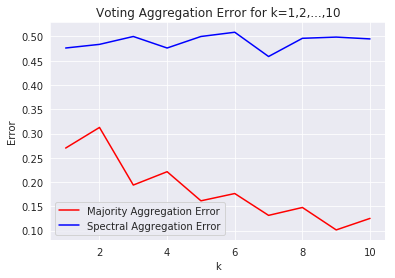

In [26]:
# def results_plot(aggregation_error)
#     ax = sns.lineplot(x=aggregation_error.index, y=aggregation_error)
#     \
#     ax.set(title='Majority Voting Aggregation Error for k=1,2,...,10', xlabel='k', ylabel='Error')
#     ax.legend(['Mean Aggregation Error']);
import matplotlib.pyplot as plt
plt.plot(mean_aggregation_error.index, mean_aggregation_error, 'r') # plotting t, a separately 
plt.plot(mean_aggregation_error_spectral.index, mean_aggregation_error_spectral, 'b') # plotting t, b separately
# ax = sns.lineplot(x=mean_aggregation_error.index, y=compute_error(spectral_aggregated_data))
plt.title('Voting Aggregation Error for k=1,2,...,10')
plt.xlabel('k')
plt.ylabel('Error')
# plt.set(title='Voting Aggregation Error for k=1,2,...,10', xlabel='k', ylabel='Error')
plt.legend(['Majority Aggregation Error', 'Spectral Aggregation Error']);

In [27]:
golden_columns = {'amt_worker_id' : worker_ids}
golden_worker_task_matrix = pd.DataFrame(golden_columns).set_index('amt_worker_id')
for task_id in unique_ids:
    worker_responses = turker_data[turker_data['orig_id'] == task_id][['!amt_worker_ids', 'gold']].set_index('!amt_worker_ids')
    worker_responses = worker_responses.rename(columns={'gold': '%d_gold' % task_id})
    golden_worker_task_matrix = golden_worker_task_matrix.join(worker_responses)
golden_worker_task_matrix = golden_worker_task_matrix.replace(0.0,-1.0)
golden_worker_task_matrix = golden_worker_task_matrix.fillna(0.0)
golden_worker_task_matrix = golden_worker_task_matrix.T
golden_worker_task_matrix

amt_worker_id  A19IBSKBTABMR3  AEX5NCH03LWSG  A17RPF5ZMO75GW  A15L6WGIK3VU7N  \
266_gold                  1.0            1.0             1.0             1.0   
934_gold                 -1.0           -1.0            -1.0            -1.0   
961_gold                  1.0            1.0             1.0             1.0   
1814_gold                 1.0            1.0             1.0             1.0   
134_gold                 -1.0           -1.0            -1.0            -1.0   
294_gold                  1.0            1.0             1.0             1.0   
103_gold                 -1.0           -1.0            -1.0            -1.0   
303_gold                  1.0            1.0             1.0             1.0   
2139_gold                -1.0           -1.0            -1.0            -1.0   
82_gold                   1.0            1.0             1.0             1.0   
938_gold                 -1.0           -1.0            -1.0            -1.0   
965_gold                 -1.0           -1.0            -1.0            -1.0   
278_gold                  1.0            1.0             1.0             1.0   
2129_gold                -1.0           -1.0            -1.0            -1.0   
1847_gold                -1.0           -1.0            -1.0            -1.0   
133_gold                  1.0            1.0             1.0             1.0   
321_gold                  1.0            1.0             1.0             1.0   
325_gold                  1.0            1.0             1.0             1.0   
936_gold                 -1.0           -1.0            -1.0            -1.0   
1848_gold                -1.0           -1.0            -1.0            -1.0   
2122_gold                 0.0            0.0             0.0            -1.0   
1816_gold                 0.0            0.0             0.0            -1.0   
1325_gold                 0.0            0.0             0.0            -1.0   
2123_gold                 0.0            0.0             0.0            -1.0   
1333_gold                 0.0            0.0             0.0            -1.0   
1216_gold                 0.0            0.0             0.0             1.0   
1285_gold                 0.0            0.0             0.0            -1.0   
25_gold                   0.0            0.0             0.0            -1.0   
550_gold                  0.0            0.0             0.0            -1.0   
1299_gold                 0.0            0.0             0.0             1.0   
...                       ...            ...             ...             ...   
995_gold                  0.0            1.0             0.0             0.0   
1979_gold                 0.0           -1.0             0.0             0.0   
507_gold                  0.0            1.0             0.0             0.0   
1994_gold                 0.0            1.0             0.0             0.0   
1967_gold                 0.0            1.0             0.0             0.0   
553_gold                  0.0           -1.0             0.0             0.0   
1984_gold                 0.0           -1.0             0.0             0.0   
1441_gold                 0.0           -1.0             0.0             0.0   
1991_gold                 0.0            1.0             0.0             0.0   
1427_gold                 0.0           -1.0             0.0             0.0   
1990_gold                 0.0           -1.0             0.0             0.0   
48_gold                   0.0            1.0             0.0             0.0   
1955_gold                 0.0            1.0             0.0             0.0   
1421_gold                 0.0           -1.0             0.0             0.0   
1963_gold                 0.0            1.0             0.0             0.0   
1425_gold                 0.0           -1.0             0.0             0.0   
1563_gold                 0.0            0.0             0.0             0.0   
2048_gold                 0.0            0.0             0.0             0.0   
